In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ignorar warnings
warnings.filterwarnings('ignore')

Matplotlib is building the font cache; this may take a moment.


In [16]:
df_general_info = pd.read_csv("/Users/saramiranda/Desktop/country_data_dsf_project/data/processed/general_info_clean.csv")
df_environmental_infrastructure = pd.read_csv("/Users/saramiranda/Desktop/country_data_dsf_project/data/processed/environment_infrastructure_clean.csv")
df_economic_indicators = pd.read_csv("/Users/saramiranda/Desktop/country_data_dsf_project/data/processed/economic_indicators_clean.csv")
df_social_indicators = pd.read_csv("/Users/saramiranda/Desktop/country_data_dsf_project/data/processed/social_indicators_clean.csv")


In [13]:
df_general_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       232 non-null    object 
 1   Capital city                  232 non-null    object 
 2   Exchange rate (per US$)       231 non-null    float64
 3   National currency             231 non-null    object 
 4   Pop. density (per km2, 2024)  230 non-null    float64
 5   Population (000, 2024)        230 non-null    float64
 6   Region                        232 non-null    object 
 7   Sex ratio (m per 100 f)       230 non-null    float64
 8   Surface area (km2)            226 non-null    float64
 9   UN membership date            193 non-null    object 
 10  Capital_city_pop              231 non-null    float64
dtypes: float64(6), object(5)
memory usage: 20.1+ KB


In [9]:
df_environmental_infrastructure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                   --------------  -----  
 0   Country                                                                                                  696 non-null    object 
 1   Year                                                                                                     696 non-null    int64  
 2   Energy production, primary (Petajoules)                                                                  656 non-null    float64
 3   Energy supply per capita (Gigajoules)                                                                    668 non-null    float64
 4   Forested area (% of land area)                                                        

In [10]:
df_economic_indicators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687 entries, 0 to 686
Data columns (total 21 columns):
 #   Column                                                                                 Non-Null Count  Dtype  
---  ------                                                                                 --------------  -----  
 0   Country                                                                                687 non-null    object 
 1   Year                                                                                   687 non-null    float64
 2   Agricultural production index (2014-2016=100)                                          594 non-null    float64
 3   Balance of payments, current account (million US$)                                     562 non-null    float64
 4   CPI: Consumer Price Index (2010=100)                                                   586 non-null    float64
 5   Economy: Agriculture (% of Gross Value Added)                                 

In [11]:
df_social_indicators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 31 columns):
 #   Column                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                   --------------  -----  
 0   Country                                                                                                  696 non-null    object 
 1   Year                                                                                                     696 non-null    float64
 2   Education: Government expenditure (% of GDP)                                                             459 non-null    float64
 3   Fertility rate, total (live births per woman)                                                            690 non-null    float64
 4   Health: Current expenditure (% of GDP)                                                

In [23]:
cols_a_evaluar = [
    "Country",
    "Year",
    "Fertility rate, total (live births per woman)",
    "Health: Current expenditure (% of GDP)",
    "Health: Physicians (per 1 000 pop.)",
    "Under five mortality rate (per 1000 live births)",
    "Urban population (% of total population)",
    "Education: Government expenditure (% of GDP)",
    "Education: Primary gross enrol. ratio - Female (per 100 pop.)",
    "Education: Primary gross enrol. ratio - Male (per 100 pop.)",
    "Education: Upper Sec. gross enrol. ratio - Female (per 100 pop.)",
    "Education: Upper Sec. gross enrol. ratio - Male (per 100 pop.)",
    "Education: Lower Sec. gross enrol. ratio - Female (per 100 pop.)",
    "Education: Lower Sec. gross enrol. ratio - Male (per 100 pop.)",
    "Population age distribution - 0-14 years (%)",
    "Population age distribution - 60+ years (%)",
    "Life expectancy at birth - Female (years)",
    "Life expectancy at birth - Male (years)",
    "Life expectancy at birth - Female/Life expectancy at birth - Male Ratio"
]


In [30]:
df_analisis = df_social_indicators[cols_a_evaluar]

print("Table size", df_analisis.shape, "\n")
print(df_analisis.head())

Table size (696, 19) 

       Country    Year  Fertility rate, total (live births per woman)  \
0  Afghanistan  2015.0                                            5.7   
1  Afghanistan  2020.0                                            5.1   
2  Afghanistan  2024.0                                            4.8   
3      Albania  2015.0                                            1.6   
4      Albania  2020.0                                            1.4   

   Health: Current expenditure (% of GDP)  \
0                                    10.1   
1                                    15.5   
2                                    21.8   
3                                     6.5   
4                                     7.5   

   Health: Physicians (per 1 000 pop.)  \
0                                  0.3   
1                                  0.3   
2                                  NaN   
3                                  1.3   
4                                  1.9   

   Under five 

## El top 10 paises con mayor ratio de Life expectancy. 

### life expectancy ratio 
100 → mujeres y hombres tienen la misma esperanza de vida. 

\>100 → mujeres viven más años que los hombres.

<100 → hombres viven más años que las mujeres (rarísimo).


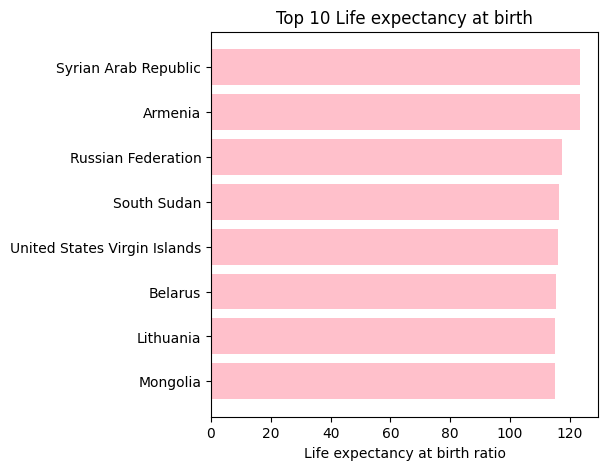

In [ ]:
top10 = df_social_indicators.nlargest(10, "Life expectancy at birth - Female/Life expectancy at birth - Male Ratio")

plt.figure(figsize=(5,5))
plt.barh(top10["Country"], top10["Life expectancy at birth - Female/Life expectancy at birth - Male Ratio"], color="pink")
plt.xlabel("Life expectancy at birth ratio")
plt.title("Mayor life expectancy en Hombres")
plt.gca().invert_yaxis()
plt.show()

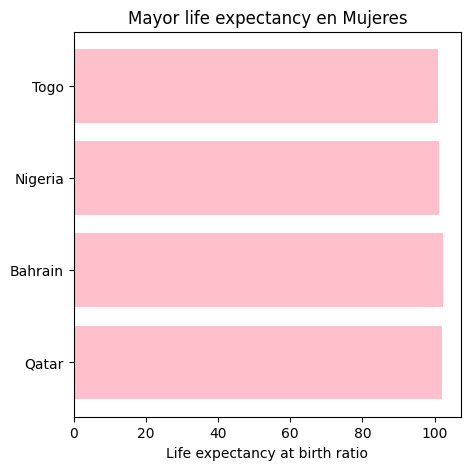

In [31]:
top10 = df_social_indicators.nsmallest(10, "Life expectancy at birth - Female/Life expectancy at birth - Male Ratio")

plt.figure(figsize=(5,5))
plt.barh(top10["Country"], top10["Life expectancy at birth - Female/Life expectancy at birth - Male Ratio"], color="pink")
plt.xlabel("Life expectancy at birth ratio")
plt.title("Mayor life expectancy en Mujeres")
plt.gca().invert_yaxis()
plt.show()